# Case Easynvest

In [1]:
# Importar módulos

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

%matplotlib inline

In [17]:
# Carregar os dados em um pandas dataframe e usar o campo ID como índice
df = pd.read_excel('./dataset.xlsx', index_col='ID')

In [19]:
# Tamanho do dataset
df.shape
# 4972 clientes e 10 features

(4972, 10)

In [20]:
# Visualizar as 5 primeiras linhas
df.head()

,GEO_REFERENCIA,DATA_NASCIMENTO,PROFISSAO,GENERO,ESTADO_CIVIL,VALOR_01,VALOR_02,VALOR_03,VALOR_04,PERFIL
ID,,,,,,,,,,
1,780,1992-08-15,ANALISTA DE SISTEMAS,M,SOLTEIRO(A),342.857143,342.857143,428.571429,28.571429,A
2,35,1990-02-24,SERVIDOR PÚBLICO ESTADUAL,F,SOLTEIRO(A),942.857143,0.000000,0.000000,0.000000,A
3,54,1987-07-17,ANALISTA DE SISTEMAS,M,SOLTEIRO(A),2000.000000,0.000000,0.000000,2857.142857,A
4,35,1988-04-27,BANCARIO E ECONOMIÁRIO,M,CASADO(A) COM BRASILEIRO(A) NATO(A),857.142857,285.714286,0.000000,1428.571429,A
5,883,1971-12-10,SERVIDOR PÚBLICO MUNICIPAL,M,CASADO(A) COM BRASILEIRO(A) NATO(A),8615.385714,0.000000,0.000000,47471.788571,A


In [21]:
# Função que transforma data de nascimento em idade
def calculate_age(born):
    '''Input: data de nasciemnto
        Output: idade'''
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

In [22]:
# Criar coluna IDADE. É mais fácil trabalhar com a idade do que com a data de nascimento
df['IDADE'] = df['DATA_NASCIMENTO'].apply(calculate_age)

In [24]:
# Dropar a data de nascimento, já que temos a idade
df = df.drop('DATA_NASCIMENTO', 1)

In [25]:
# Separar as colunas em 2 grupos: colunas numéricas e categóricas. 
numerical_columns  = ['GEO_REFERENCIA', 'VALOR_01', 'VALOR_02', 'VALOR_03', 'VALOR_04', 'IDADE']
categorical_columns = ['PROFISSAO', 'GENERO', 'ESTADO_CIVIL', 'PERFIL']

In [28]:
# Calcular a correlação entre as variáveis númericas. Método de Pearson
df[numerical_columns].corr(method='pearson')
# As variáveis possuem pouca ou nenhuma correlação

,GEO_REFERENCIA,VALOR_01,VALOR_02,VALOR_03,VALOR_04,IDADE
GEO_REFERENCIA,1.000000,-0.017800,-0.039491,-0.008389,-0.034347,-0.004017
VALOR_01,-0.017800,1.000000,0.127562,0.050666,0.075647,0.117684
VALOR_02,-0.039491,0.127562,1.000000,0.210956,0.215647,0.203603
VALOR_03,-0.008389,0.050666,0.210956,1.000000,0.064077,0.126032
VALOR_04,-0.034347,0.075647,0.215647,0.064077,1.000000,0.132490
IDADE,-0.004017,0.117684,0.203603,0.126032,0.132490,1.000000


In [27]:
# Checar os dados categóricos
df.describe(include=['object'])

,PROFISSAO,GENERO,ESTADO_CIVIL,PERFIL
count,4972,4972,4972,4972
unique,79,2,8,4
top,ANALISTA DE SISTEMAS,M,SOLTEIRO(A),A
freq,564,3865,2584,3489


In [29]:
# Função para plotar gráfico de barras

def plot_count(data, column, rot=0):
    '''Input: dataframe; coluna contra a qual se deseja plotar o gráfico; ângulo de rotação da legenda
        Output: None'''
    ax = plt.axes()
    sns.countplot(x=column, data=data, ax=ax);
    ax.set_title(column)
    plt.xticks(rotation=rot)
    plt.show()

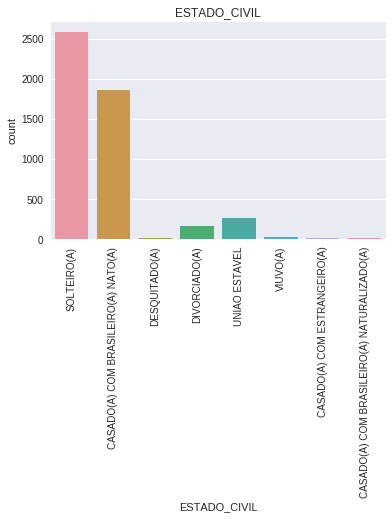

In [30]:
# Plotar gráfico de barra x ESTADO_CIVIL
plot_count(df, 'ESTADO_CIVIL',rot=90)

In [31]:
# Há poucas clientes com status de desquitado.
# DESQUITADO e DIVORCIADO podem ser agrupados em uma única classe. Desquitado passa a ser divorciado

df['ESTADO_CIVIL'].replace('DESQUITADO(A)', 'DIVORCIADO(A)', inplace=True)

In [32]:
# O mesmo acontece com Casados com Estrangeiros
# CASADO COM ESTRANGEIRO passa a ser CASADO COM BRASILEIRO NATURALIZADO
df['ESTADO_CIVIL'].replace('CASADO(A) COM BRASILEIRO(A) NATURALIZADO(A)', 'CASADO(A) COM ESTRANGEIRO(A)', inplace=True)

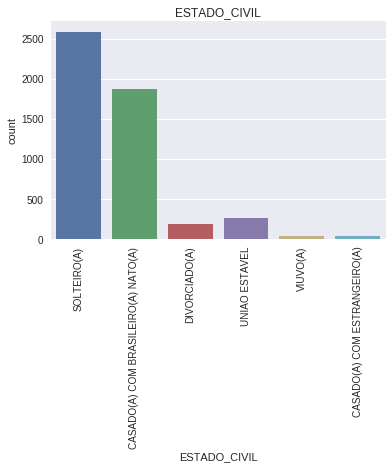

In [33]:
# Plotar novamente gráfico de barra x ESTADO_CIVIL
plot_count(df, 'ESTADO_CIVIL',rot=90)

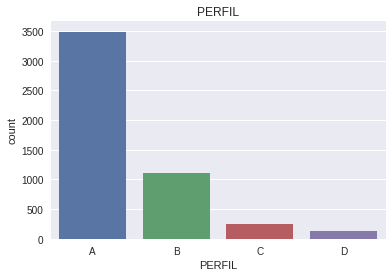

In [35]:
# Plotar dados X PERFIL.
plot_count(df,'PERFIL')

In [37]:
# Checar a frequência de profissões no dataset
df['PROFISSAO'].value_counts()

ANALISTA DE SISTEMAS                                  564
ENGENHEIRO                                            505
ADMINISTRADOR                                         442
ESTUDANTE                                             409
SERVIDOR PÚBLICO FEDERAL                              279
AUTÔNOMO                                              269
AUXILIAR DE ESCRITÓRIO E ASSEMELHADOS                 215
SERVIDOR PÚBLICO ESTADUAL                             211
EMPRESÁRIO                                            164
MÉDICO                                                157
MILITAR EM GERAL                                      123
ADVOGADO                                              119
BANCARIO E ECONOMIÁRIO                                113
SERVIDOR PÚBLICO MUNICIPAL                            108
APOSENTADO (EXCETO FUNCIONÁRIO PÚBLICO)                93
CONTADOR                                               87
VENDEDOR DE COMÉRCIO VAREJISTA E ATACADISTA            81
PROFESSOR DE P

In [38]:
# Há 79 profissões diferentes e algumas profissões são muito mais frequentes que outras.
# Substituir todas as profissões com frequência menor que 20 por um token especial: RARE

df.loc[df['PROFISSAO'].value_counts()[df['PROFISSAO']].values < 20, 'PROFISSAO'] = 'RARE'

In [42]:
# Nova frequência de profissões no dataset. Agora há 37 profissões.
df['PROFISSAO'].value_counts()

ANALISTA DE SISTEMAS                           564
ENGENHEIRO                                     505
ADMINISTRADOR                                  442
ESTUDANTE                                      409
RARE                                           314
SERVIDOR PÚBLICO FEDERAL                       279
AUTÔNOMO                                       269
AUXILIAR DE ESCRITÓRIO E ASSEMELHADOS          215
SERVIDOR PÚBLICO ESTADUAL                      211
EMPRESÁRIO                                     164
MÉDICO                                         157
MILITAR EM GERAL                               123
ADVOGADO                                       119
BANCARIO E ECONOMIÁRIO                         113
SERVIDOR PÚBLICO MUNICIPAL                     108
APOSENTADO (EXCETO FUNCIONÁRIO PÚBLICO)         93
CONTADOR                                        87
VENDEDOR DE COMÉRCIO VAREJISTA E ATACADISTA     81
PROFESSOR DE PRIMEIRO E SEGUNDO GRAUS           79
TÉCNICO DE ELETRICIDADE        

# Clusterização

O algoritmo de clusterização mais utilizado é o K-Means. Este usa a distância Euclidiana entre os dados para calcular os centros dos clusters. O K-Means funciona muito bem para features exclusivamente numéricas. Contudo, o dataset deste case é um Mix entre features numéricas e categóricas. Portanto uma outra opção de algoritmo de clusterização deve ser utilizada. Uma boa opção para lidar com dados categóricos é o K-Modes. Este não usa a distância Euclidiana para encontrar os clusters. O algoritmo faz uso de dissimilaridades para agrupar os dados. Uma variação do K-Modes é o K-Prototypes. Este é capaz de lidar com um dataset que tenha features numéricas e categóricas (mais detalhes em: https://datascience.stackexchange.com/questions/22/k-means-clustering-for-mixed-numeric-and-categorical-data/24#24 e https://amva4newphysics.wordpress.com/2016/10/26/into-the-world-of-clustering-algorithms-k-means-k-modes-and-k-prototypes/ e http://dpmartin42.github.io/blogposts/r/cluster-mixed-types)

Felizmente já há uma implementação do algoritmo K-Prototypes para Python disponível em: https://github.com/nicodv/kmodes


Este será o algoritmo de clusterização utilizado neste case


In [43]:
# Fazer uma cópia do dataframe
data = df.copy()

In [44]:
# Normalizar as colunas com features numéricas. Normalização Z-score

data[numerical_columns] = (data[numerical_columns] - data[numerical_columns].mean())/data[numerical_columns].std()

In [45]:
data.head()

,GEO_REFERENCIA,PROFISSAO,GENERO,ESTADO_CIVIL,VALOR_01,VALOR_02,VALOR_03,VALOR_04,PERFIL,IDADE
ID,,,,,,,,,,
1,1.473810,ANALISTA DE SISTEMAS,M,SOLTEIRO(A),-0.275437,-0.205147,-0.101410,-0.215630,A,-1.029714
2,-1.003643,SERVIDOR PÚBLICO ESTADUAL,F,SOLTEIRO(A),-0.177057,-0.208992,-0.112795,-0.216859,A,-0.751840
3,-0.940460,ANALISTA DE SISTEMAS,M,SOLTEIRO(A),-0.003722,-0.208992,-0.112795,-0.093951,A,-0.473966
4,-1.003643,BANCARIO E ECONOMIÁRIO,M,CASADO(A) COM BRASILEIRO(A) NATO(A),-0.191112,-0.205788,-0.112795,-0.155405,A,-0.566590
5,1.816331,SERVIDOR PÚBLICO MUNICIPAL,M,CASADO(A) COM BRASILEIRO(A) NATO(A),1.080977,-0.208992,-0.112795,1.825286,A,0.915405


In [46]:
# Importar k-prototypes
from kmodes import kprototypes

In [47]:
# Função que calcula o número ideal de clusters

def plot_cost(X, categorical_index, range_clusters):
    '''Input- X: matriz de dados; 
              categorical_index:  lista dos índices de variáveis categóricas (ver documentação do kmodes); 
              range_clusters: lista de número de clusters testados
              
        Output: Número ótimo de clusters no intervalo testado.'''
    
    # lista de custos
    cost = []
    
    # Iterar sobre o número de clusters
    for i, n_cluster in enumerate(range_clusters):
        
        print("Iteração número: {}".format(i + 1))
        
        # Inicializar o objeto de clusterização
        kproto = kprototypes.KPrototypes(n_clusters=n_cluster, init='Cao')
        
        # Calcular os clusters
        clusters = kproto.fit_predict(X, categorical=categorical_index)
        
        cost.append(kproto.cost_) # Calcular custo
    
    # Plotar a curva de custo em função do número de clusters
    plt.ylabel('Custo')
    plt.xlabel('Número de Clusters')
    plt.plot(range_clusters, cost)
    
    # Encontrar o número de clusters que retorna o menor valor de custo
    min_cost = min(cost)
    min_index = cost.index(min_cost)
    min_cost_cluster = range_clusters[min_index] 
    
    return min_cost_cluster

Iteração número: 1
Iteração número: 2
Iteração número: 3
Iteração número: 4
Iteração número: 5
Iteração número: 6
Iteração número: 7
Iteração número: 8
Iteração número: 9
Iteração número: 10


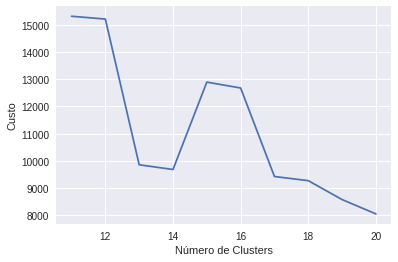

In [49]:
# Testar número de clusters de 11 a 20
N_opt = plot_cost(X=data.values, categorical_index=[1, 2, 3, 8], range_clusters=list(range(11,21)))

In [50]:
# Número ideal de clusters
N_opt

20

In [51]:
# Clusterizar com número de clusters igual a 20

kproto = kprototypes.KPrototypes(n_clusters=20, init='Cao')
        
# Obter labels para os dados
labels = kproto.fit_predict(data.values, categorical=[1, 2, 3, 8])
        

Para visualizar os clusters, será usada a técnica tSNE de redução de dimensionalidade. Ao contrário do PCA, que não funciona muito bem para grandes reduções pois ocorre em muita perda de informação, o tSNE consegue preservar a distância relativa entre os dados. Isto é uma característica importante para visualização de clusters. O módulo Scikit-learn fornece uma implementação eficiente do tSNE e será usada neste trabalho. Contudo, a implementação do Scikit-learn não permite o uso de uma métrica adequada para dados com features categóricas. A métrica de distância ideal para o problema seria a Distância de Gower, porém será feito o uso da Distância Euclidiana na falta de melhor opção.

In [52]:
# Para usar a Distância Euclidiana, é preciso transformar as variáveis categóricas em numéricas. Isso será feito
# com uma codificação discreta. Cada elemento de uma categoria recebe um valor inteiro.

# Função para transformar categoricas em numéricas.
def cat2digit(dataframe, categorical):
    '''Input- dataframe: dataset;
              categorical: lista com os nomes das colunas categóricas'''
    
    # Iterar sobre as categorias
    for cat in categorical:
        # Encontrar valores únicos na coluna
        unique_values = dataframe[cat].unique().tolist()
        
        # Criar lista de 0 ao número de valores únicos na coluna
        digits = list(range(0, len(unique_values)))
        
        # Criar uma função que mapeia o valor da coluna a um dígito
        mapping = dict(zip(unique_values, digits))
        
        # Substituir categorias por dígitos
        dataframe = dataframe.replace({cat: mapping})
        
    return dataframe

In [53]:
# Transformar categorias em dígitos
data = cat2digit(data, categorical_columns)

In [54]:
# Checar os dados
data.head()

,GEO_REFERENCIA,PROFISSAO,GENERO,ESTADO_CIVIL,VALOR_01,VALOR_02,VALOR_03,VALOR_04,PERFIL,IDADE
ID,,,,,,,,,,
1,1.473810,0,0,0,-0.275437,-0.205147,-0.101410,-0.215630,0,-1.029714
2,-1.003643,1,1,0,-0.177057,-0.208992,-0.112795,-0.216859,0,-0.751840
3,-0.940460,0,0,0,-0.003722,-0.208992,-0.112795,-0.093951,0,-0.473966
4,-1.003643,2,0,1,-0.191112,-0.205788,-0.112795,-0.155405,0,-0.566590
5,1.816331,3,0,1,1.080977,-0.208992,-0.112795,1.825286,0,0.915405


In [55]:
# Importar tSNE 
from sklearn.manifold import TSNE

In [56]:
# Inicializar o objeto TSNE usando 2 componentes pois os dados serão plotados em 2 dimensões
tsne = TSNE(n_components=2, random_state=0)

In [57]:
# Encontrar dados em 2 dimensões
data_2d = tsne.fit_transform(data)

In [58]:
# Os dados serão plotados usando o módulo Bokeh
# Importar recursos
from bokeh.plotting import figure, output_notebook, show, ColumnDataSource
from bokeh.models import HoverTool
from bokeh.palettes import magma

In [59]:
# Criar uma paleta de cores de acordo com o número de clusters. No caso, 20
paleta = magma(20)

In [60]:
# Criar lista de cores hexadecimais para cada elemento no dataset de acordo ao cluster pertencente
hexa= [paleta[i] for i in labels]

In [61]:
# Função que converte cores em hexadecimal para rgb

def hex_to_rgb(hexa):
    """Input - hexa: cor hexadecimal;
       Output - tupla de cor rgb"""
    hexa = hexa.lstrip('#')
    lv = len(hexa)
    return tuple(int(hexa[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))

In [64]:
# Transformar hexadecimal em RGB
rgb = [hex_to_rgb(h) for h in hexa]

In [71]:
# Plotar o gráfico inline
output_notebook()

# Criar datasource
source = ColumnDataSource(data=dict(
    x= data_2d[:, 0],
    y= data_2d[:, 1],
    Profissao= df.PROFISSAO.values.tolist(),
    Idade = df.IDADE.values.tolist(),
    Sexo = df.GENERO.values.tolist(),
    Perfil = df.PERFIL.values.tolist(),
    
))



# Lista de cores
colors = [
    "#%02x%02x%02x" % (int(r), int(g), int(b)) for r, g, b in rgb
]

# Criar hovertool
hover = HoverTool(tooltips=[
    ("(x,y)", "($x, $y)"),
    ("Idade", "@Idade"),
    ("Sexo", "@Sexo"),
    ("Profissão", "@Profissao"),
    ("Perfil", "@Perfil")
    
])


Tools="crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"


p = figure(plot_width=700, plot_height=700, tools=[hover, Tools],
           title="Mouse over the dots")

p.scatter('x', 'y', size=20, source=source, fill_color=colors, fill_alpha=0.6)

show(p)

Loading BokehJS ...

/home/igorbpf/job/easynvest/env/lib/python3.5/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: 
Supplying a user-defined data source AND iterable values to glyph methods is deprecated.

See https://github.com/bokeh/bokeh/issues/2056 for more information.

  warn(message)


Pelo gráfico interativo, é possível observar que há formação de alguns clusters entre os dados. Apesar de não haver uma fronteira bem definida entre a maioria deles, boa parte dos clientes está agrupada em função de suas profissões. Na região em torno de (8,5; -8,5), há uma concentração de Aposentados (exceto funcionário público). Uma coisa interessante de se notar é que usuários de profissões consideradas raras (frequência menor que 20), estão agrupados em torno do ponto (-8,8;4,0). Outra coisa interessante é que mais de 1 um cluster da mesma profissão é formado. Na região em torno de (-2,5;-6,3), há um cluster de Estudantes de Perfil A. Enquanto na região em torno de (11;8), há outro cluster de estudantes, porém estes têm Perfil B e C. Na região de (7,5;-12), também há um outro cluster de estudantes, porém estes têm idade superior aos estudantes dos outros grupos.


Os resultados mostram que é possível agrupar os clientes do dataset em clusters e que o clientes que formam estes clusters têm algumas características em comum. Todavia, a visualização obtida poderia ser ainda melhor caso a métrica usada no tSNE fosse a adequada para o tipo de dado.